In [4]:
import qlib
from qlib.constant import REG_US

qlib.init(provider_uri=r"X:/QuantumTickAI/trading-lab/data/raw/qlib_data", region=REG_US)

[4188:MainThread](2025-09-18 16:34:07,677) INFO - qlib.Initialization - [config.py:452] - default_conf: client.
[4188:MainThread](2025-09-18 16:34:07,680) INFO - qlib.Initialization - [__init__.py:75] - qlib successfully initialized based on client settings.
[4188:MainThread](2025-09-18 16:34:07,681) INFO - qlib.Initialization - [__init__.py:77] - data_path={'__DEFAULT_FREQ': WindowsPath('X:/QuantumTickAI/trading-lab/data/raw/qlib_data')}


In [ ]:
from qlib.contrib.data.handler import Alpha158

# Create Alpha158 data handler
dh = Alpha158(instruments="sp500") 

[4188:MainThread](2025-09-18 16:35:22,816) INFO - qlib.timer - [log.py:127] - Time cost: 73.823s | Loading data Done
[4188:MainThread](2025-09-18 16:35:24,119) INFO - qlib.timer - [log.py:127] - Time cost: 0.450s | DropnaLabel Done
[4188:MainThread](2025-09-18 16:35:27,215) INFO - qlib.timer - [log.py:127] - Time cost: 3.095s | CSZScoreNorm Done
[4188:MainThread](2025-09-18 16:35:27,295) INFO - qlib.timer - [log.py:127] - Time cost: 4.478s | fit & process data Done
[4188:MainThread](2025-09-18 16:35:27,295) INFO - qlib.timer - [log.py:127] - Time cost: 78.301s | Init data Done


In [7]:
df = dh.fetch(col_set="feature")
print(df.head())

                           KMID      KLEN     KMID2       KUP      KUP2  \
datetime   instrument                                                     
1999-12-31 A          -0.027516  0.046384 -0.593218  0.005503  0.118647   
           AA          0.030800  0.033780  0.911765  0.002981  0.088235   
           AAPL        0.018576  0.033436  0.555558  0.000619  0.018517   
           ABC         0.000000  0.016461  0.000000  0.004115  0.250000   
           ABT        -0.003430  0.010292 -0.333329  0.001715  0.166676   

                           KLOW     KLOW2          KSFT     KSFT2     OPEN0  \
datetime   instrument                                                         
1999-12-31 A           0.013365  0.288135 -1.965417e-02 -0.423730  1.028294   
           AA          0.000000  0.000000  2.781919e-02  0.823531  0.970120   
           AAPL        0.014241  0.425925  3.219817e-02  0.962966  0.981763   
           ABC         0.012346  0.750000  8.230448e-03  0.500000  1.000000   


In [8]:
print(df.columns.tolist())

['KMID', 'KLEN', 'KMID2', 'KUP', 'KUP2', 'KLOW', 'KLOW2', 'KSFT', 'KSFT2', 'OPEN0', 'HIGH0', 'LOW0', 'VWAP0', 'ROC5', 'ROC10', 'ROC20', 'ROC30', 'ROC60', 'MA5', 'MA10', 'MA20', 'MA30', 'MA60', 'STD5', 'STD10', 'STD20', 'STD30', 'STD60', 'BETA5', 'BETA10', 'BETA20', 'BETA30', 'BETA60', 'RSQR5', 'RSQR10', 'RSQR20', 'RSQR30', 'RSQR60', 'RESI5', 'RESI10', 'RESI20', 'RESI30', 'RESI60', 'MAX5', 'MAX10', 'MAX20', 'MAX30', 'MAX60', 'MIN5', 'MIN10', 'MIN20', 'MIN30', 'MIN60', 'QTLU5', 'QTLU10', 'QTLU20', 'QTLU30', 'QTLU60', 'QTLD5', 'QTLD10', 'QTLD20', 'QTLD30', 'QTLD60', 'RANK5', 'RANK10', 'RANK20', 'RANK30', 'RANK60', 'RSV5', 'RSV10', 'RSV20', 'RSV30', 'RSV60', 'IMAX5', 'IMAX10', 'IMAX20', 'IMAX30', 'IMAX60', 'IMIN5', 'IMIN10', 'IMIN20', 'IMIN30', 'IMIN60', 'IMXD5', 'IMXD10', 'IMXD20', 'IMXD30', 'IMXD60', 'CORR5', 'CORR10', 'CORR20', 'CORR30', 'CORR60', 'CORD5', 'CORD10', 'CORD20', 'CORD30', 'CORD60', 'CNTP5', 'CNTP10', 'CNTP20', 'CNTP30', 'CNTP60', 'CNTN5', 'CNTN10', 'CNTN20', 'CNTN30', 'CNT

# Alpha158 Feature Explanations

## 1. K-line / Candlestick Shape
- **KMID**: Midpoint of candlestick = (Close + Open)/2  
- **KLEN**: Length of candlestick = |Close – Open|  
- **KMID2**: Square of candlestick midpoint  
- **KUP / KUP2**: Upper shadow length (High – max(Open, Close)), squared version too  
- **KLOW / KLOW2**: Lower shadow length (min(Open, Close) – Low), squared version too  
- **KSFT / KSFT2**: Candlestick shift = (Close – Open), squared version too  
- **OPEN0, HIGH0, LOW0, VWAP0**: Normalized open, high, low, and VWAP (relative to close)  

---

## 2. Rate of Change (Momentum)
- **ROC5, ROC10, ROC20, ROC30, ROC60**: Rate of change of Close over 5, 10, 20, 30, 60 days  

---

## 3. Moving Averages & Volatility
- **MA5, MA10, … MA60**: Rolling moving averages of Close  
- **STD5, STD10, … STD60**: Rolling standard deviations of Close (volatility)  

---

## 4. Beta & Regression Fit
- **BETA5 … BETA60**: Rolling beta (stock vs market return regression slope)  
- **RSQR5 … RSQR60**: Regression R² (goodness of fit)  
- **RESI5 … RESI60**: Regression residuals (unexplained variance)  

---

## 5. High/Low Extremes
- **MAX5 … MAX60**: Rolling maximum of Close  
- **MIN5 … MIN60**: Rolling minimum of Close  
- **QTLU5 … QTLU60**: Rolling upper quantile of Close  
- **QTLD5 … QTLD60**: Rolling lower quantile of Close  

---

## 6. Ranking & Oscillator Features
- **RANK5 … RANK60**: Rank of today’s Close within the past n-day window  
- **RSV5 … RSV60**: Raw stochastic value = (Close – Min) / (Max – Min)  

---

## 7. Intra-window Extremes
- **IMAX5 … IMAX60**: Indicator if Close equals rolling max  
- **IMIN5 … IMIN60**: Indicator if Close equals rolling min  
- **IMXD5 … IMXD60**: Difference between max and min in window  

---

## 8. Correlation Features
- **CORR5 … CORR60**: Rolling correlation (Close vs Volume)  
- **CORD5 … CORD60**: Detrended correlation  

---

## 9. Count / Sum Features
- **CNTP5 … CNTP60**: Count of positive returns in window  
- **CNTN5 … CNTN60**: Count of negative returns  
- **CNTD5 … CNTD60**: Difference (positive – negative days)  
- **SUMP5 … SUMP60**: Sum of positive returns  
- **SUMN5 … SUMN60**: Sum of negative returns  
- **SUMD5 … SUMD60**: Difference (positive – negative sums)  

---

## 10. Volume-based Indicators
- **VMA5 … VMA60**: Volume moving averages  
- **VSTD5 … VSTD60**: Volume standard deviations  
- **WVMA5 … WVMA60**: Weighted volume moving averages  
- **VSUMP5 … VSUMP60**: Sum of positive-volume days  
- **VSUMN5 … VSUMN60**: Sum of negative-volume days  
- **VSUMD5 … VSUMD60**: Difference between positive and negative volume sums  


In [15]:
import qlib
from qlib.constant import REG_US
from qlib.data import D
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# ✅ Init Qlib
provider_uri = r"X:/QuantumTickAI/trading-lab/data/raw/qlib_data"
qlib.init(provider_uri=provider_uri, region=REG_US)

# Pick an instrument (e.g. AAPL)
instrument = "AAPL"

[4188:MainThread](2025-09-19 08:43:20,421) INFO - qlib.Initialization - [config.py:452] - default_conf: client.
[4188:MainThread](2025-09-19 08:43:20,424) INFO - qlib.Initialization - [__init__.py:75] - qlib successfully initialized based on client settings.
[4188:MainThread](2025-09-19 08:43:20,426) INFO - qlib.Initialization - [__init__.py:77] - data_path={'__DEFAULT_FREQ': WindowsPath('X:/QuantumTickAI/trading-lab/data/raw/qlib_data')}


In [21]:
df = D.features(
    instruments=[instrument],
    fields=[
        "$close",
        "$volume",
        "Ref($close, 1)",          # yesterday close
        "Mean($close, 5)",         # 5-day moving average
        "Std($close, 10)",         # 10-day rolling volatility
        "Ref($close, -5)/$close-1" # 5-day forward return
    ],
    start_time="2019-01-01",
    end_time="2020-01-01",
    freq="day"
)

In [22]:
# drop instrument level for single stock
df = df.droplevel(0)
df.head()

,$close,$volume,"Ref($close, 1)","Mean($close, 5)","Std($close, 10)","Ref($close, -5)/$close-1"
datetime,,,,,,
2019-01-02,48.697075,120116240.0,48.641567,48.426327,1.598099,-0.029192
2019-01-03,43.846485,296116832.0,48.697075,47.502464,1.796122,0.081651
2019-01-04,45.718258,190057296.0,43.846485,47.015865,1.724987,0.027182
2019-01-07,45.616501,177639216.0,45.718258,46.503979,1.734772,0.013993
2019-01-08,46.486092,133041168.0,45.616501,46.072884,1.734604,0.015390


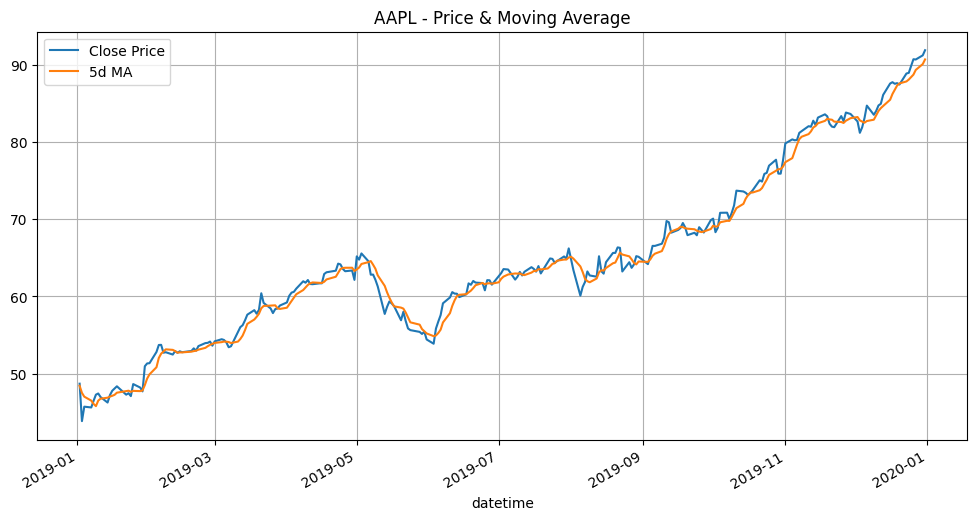

In [23]:
# -------------------
# 1. Time Series Plot
# -------------------
plt.figure(figsize=(12,6))
df["$close"].plot(label="Close Price")
df["Mean($close, 5)"].plot(label="5d MA")
plt.title(f"{instrument} - Price & Moving Average")
plt.legend()
plt.grid(True)
plt.show()

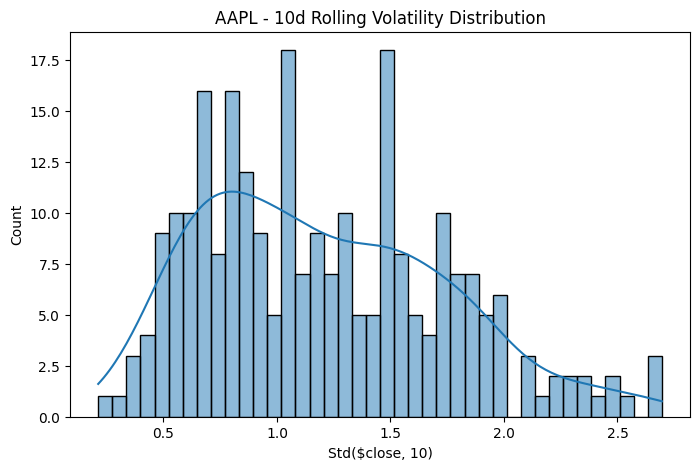

In [24]:
# -------------------
# 2. Histogram of Volatility
# -------------------
plt.figure(figsize=(8,5))
sns.histplot(df["Std($close, 10)"].dropna(), bins=40, kde=True)
plt.title(f"{instrument} - 10d Rolling Volatility Distribution")
plt.show()


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


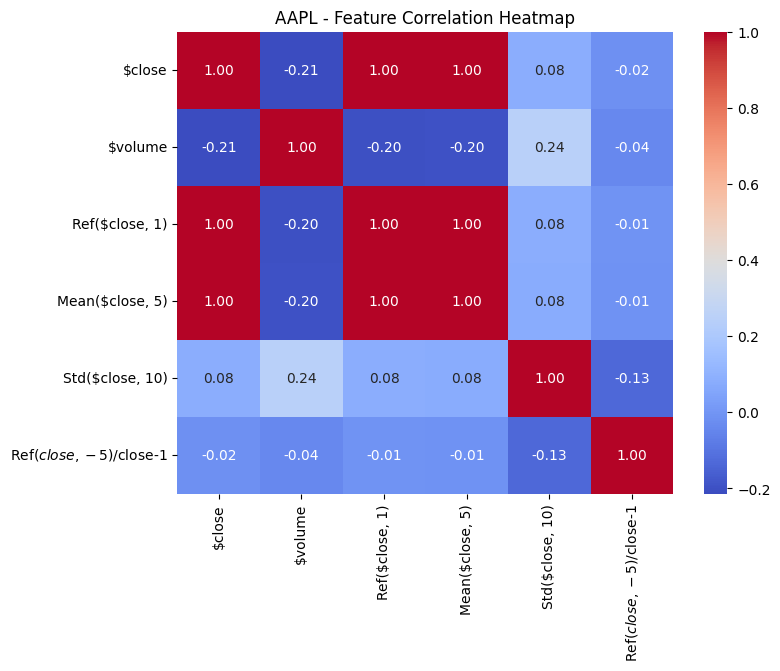

In [25]:
# -------------------
# 3. Correlation Heatmap
# -------------------
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title(f"{instrument} - Feature Correlation Heatmap")
plt.show()

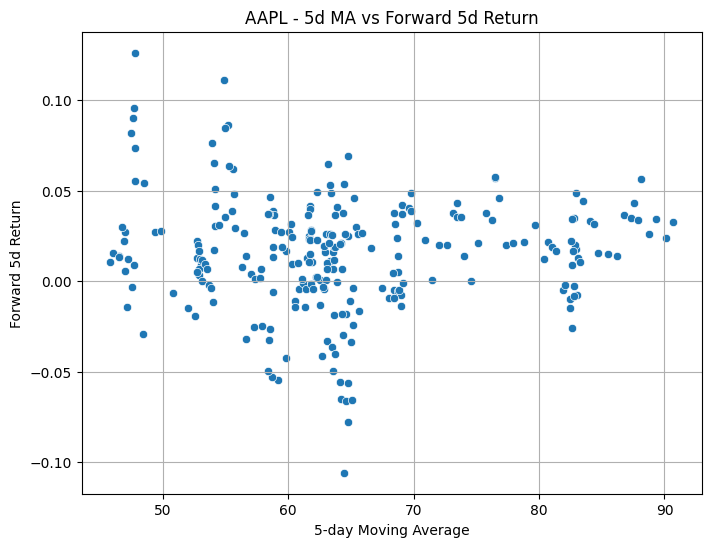

In [26]:
# -------------------
# 4. Scatter Plot Scatter vs Forward Returns
# -------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Mean($close, 5)"], y=df["Ref($close, -5)/$close-1"])
plt.title(f"{instrument} - 5d MA vs Forward 5d Return")
plt.xlabel("5-day Moving Average")
plt.ylabel("Forward 5d Return")
plt.grid(True)
plt.show()

In [27]:
# ==========================
# Pick instruments
# ==========================
instruments = ["AAPL", "MSFT", "AMZN"]
start = "2019-01-01"
end = "2020-01-01"

In [28]:
# ==========================
# Load features for each ticker
# ==========================
dfs = {}
for inst in instruments:
    df = D.features(
        instruments=[inst],
        fields=[
            "$close",
            "$volume",
            "Ref($close, 1)",          # yesterday close
            "Mean($close, 5)",         # 5-day moving average
            "Std($close, 10)",         # 10-day rolling volatility
            "Ref($close, -5)/$close-1" # 5-day forward return
        ],
        start_time=start,
        end_time=end,
        freq="day"
    )
    dfs[inst] = df.droplevel(0)  # drop instrument level

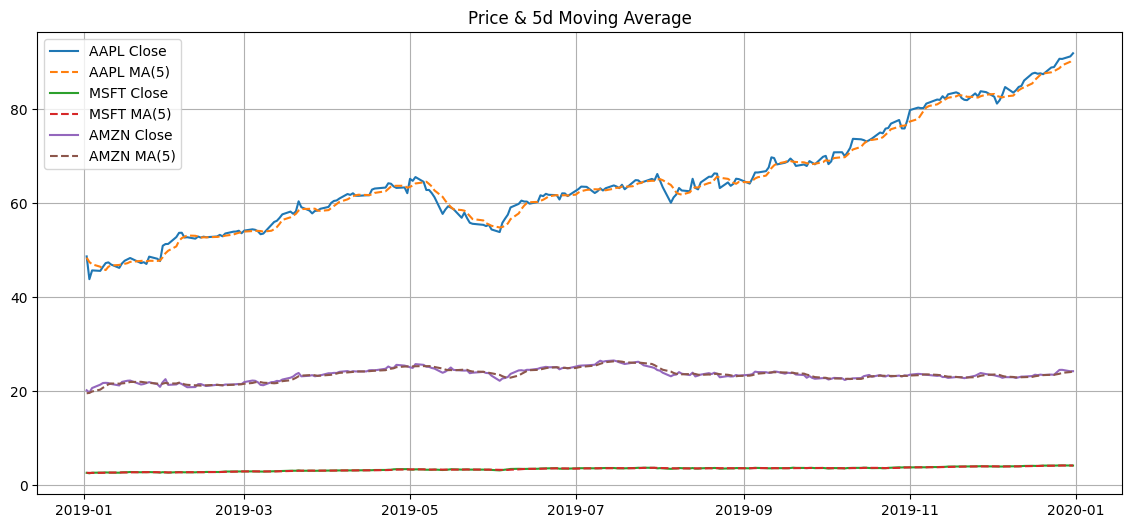

In [29]:
# ==========================
# 1. Price + Moving Average
# ==========================
plt.figure(figsize=(14,6))
for inst in instruments:
    plt.plot(dfs[inst].index, dfs[inst]["$close"], label=f"{inst} Close")
    plt.plot(dfs[inst].index, dfs[inst]["Mean($close, 5)"], linestyle="--", label=f"{inst} MA(5)")
plt.title("Price & 5d Moving Average")
plt.legend()
plt.grid(True)
plt.show()

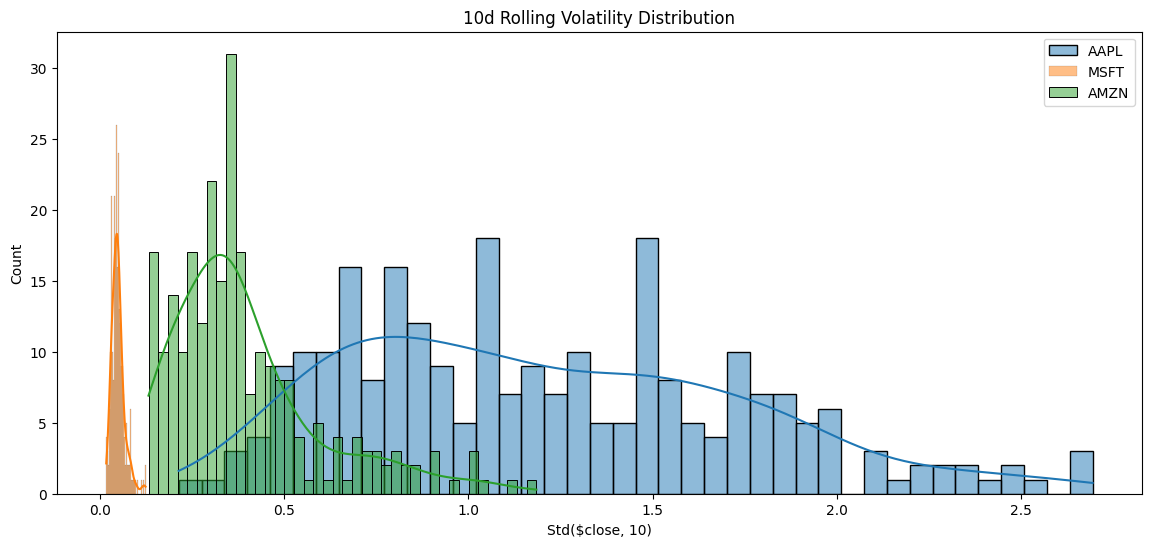

In [30]:
# ==========================
# 2. Volatility Histograms
# ==========================
plt.figure(figsize=(14,6))
for inst in instruments:
    sns.histplot(dfs[inst]["Std($close, 10)"].dropna(), bins=40, kde=True, label=inst, alpha=0.5)
plt.title("10d Rolling Volatility Distribution")
plt.legend()
plt.show()

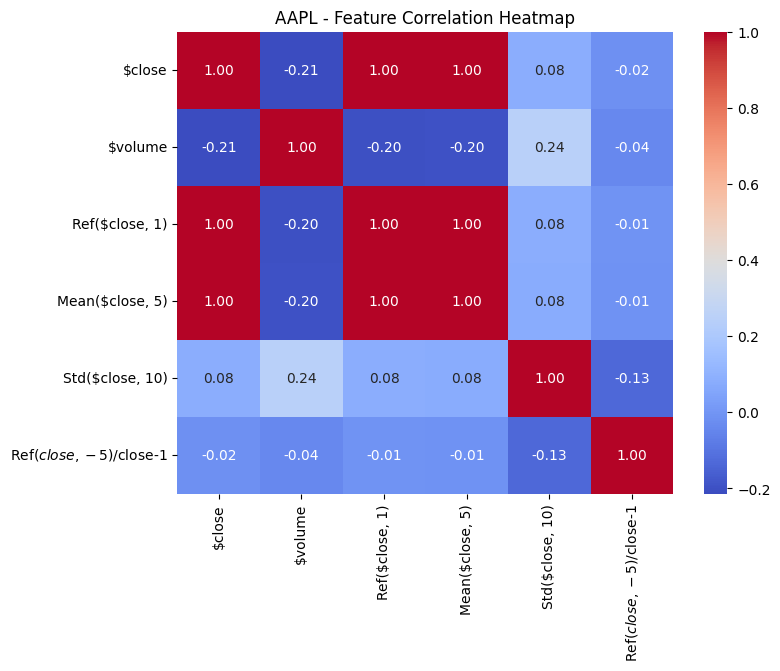

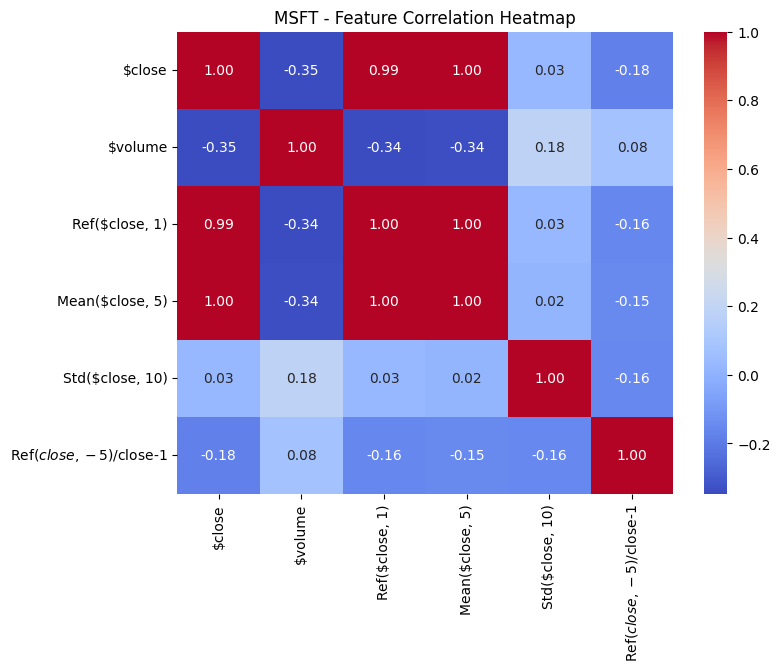

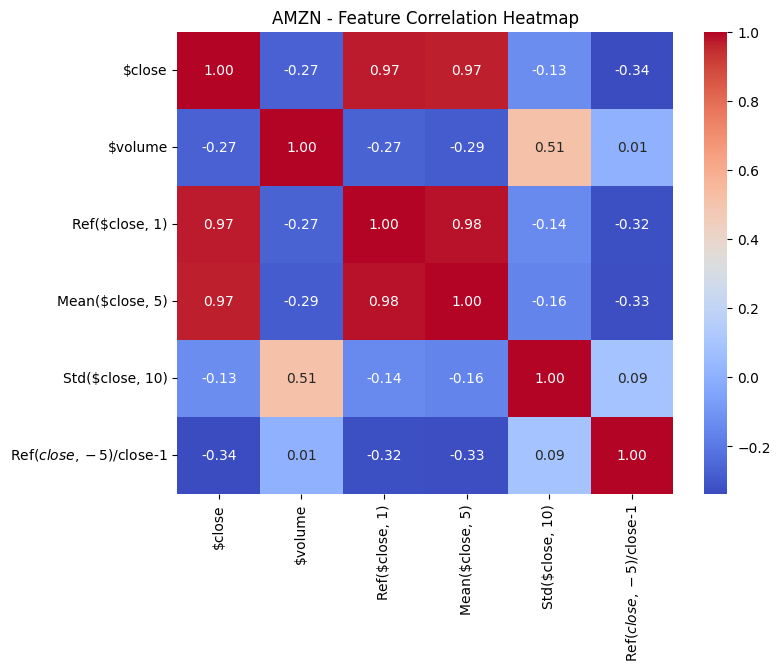

In [31]:
# ==========================
# 3. Correlation Heatmaps
# ==========================
for inst in instruments:
    plt.figure(figsize=(8,6))
    sns.heatmap(dfs[inst].corr(), cmap="coolwarm", annot=True, fmt=".2f")
    plt.title(f"{inst} - Feature Correlation Heatmap")
    plt.show()

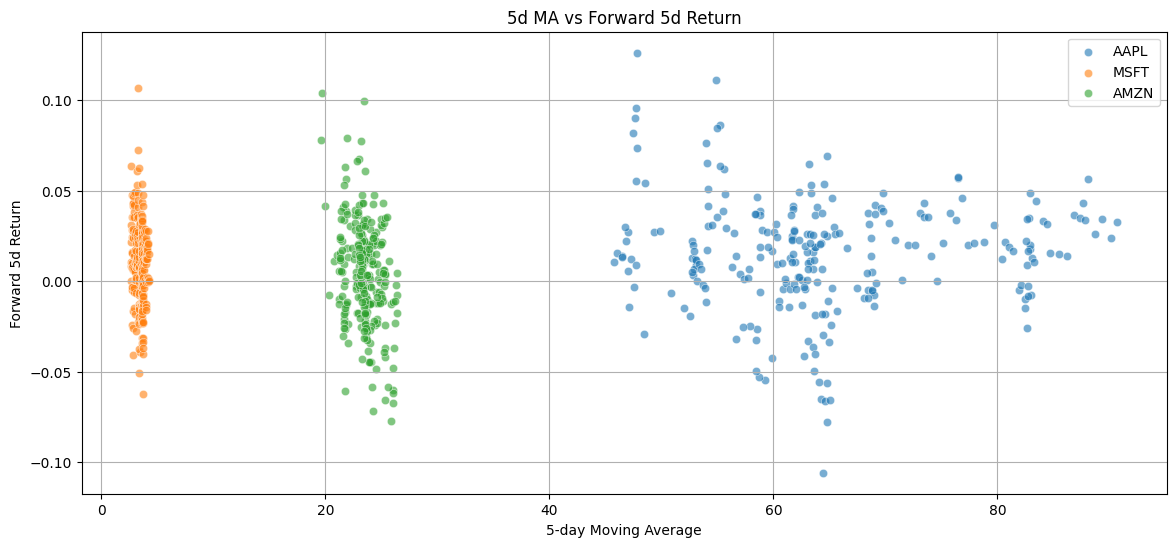

In [32]:
# ==========================
# 4. Scatter vs Forward Return
# ==========================
plt.figure(figsize=(14,6))
for inst in instruments:
    sns.scatterplot(
        x=dfs[inst]["Mean($close, 5)"],
        y=dfs[inst]["Ref($close, -5)/$close-1"],
        label=inst,
        alpha=0.6
    )
plt.title("5d MA vs Forward 5d Return")
plt.xlabel("5-day Moving Average")
plt.ylabel("Forward 5d Return")
plt.grid(True)
plt.legend()
plt.show()

In [33]:
import qlib
from qlib.constant import REG_US
from qlib.data import D
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [35]:
# ✅ Initialize Qlib
provider_uri = r"X:/QuantumTickAI/trading-lab/data/raw/qlib_data"
qlib.init(provider_uri=provider_uri, region=REG_US)

print("📊 Qlib Alpha158 Feature Visualization Toolkit")
print("=" * 50)

[4188:MainThread](2025-09-19 08:56:46,228) INFO - qlib.Initialization - [config.py:452] - default_conf: client.
[4188:MainThread](2025-09-19 08:56:46,233) INFO - qlib.Initialization - [__init__.py:75] - qlib successfully initialized based on client settings.
[4188:MainThread](2025-09-19 08:56:46,234) INFO - qlib.Initialization - [__init__.py:77] - data_path={'__DEFAULT_FREQ': WindowsPath('X:/QuantumTickAI/trading-lab/data/raw/qlib_data')}


📊 Qlib Alpha158 Feature Visualization Toolkit


In [36]:
# =============================================================================
# 1. DATA LOADING WITH EXTENDED ALPHA158 FEATURES
# =============================================================================

def load_alpha158_features(instrument="AAPL", start_time="2019-01-01", end_time="2023-01-01"):
    """Load comprehensive Alpha158 features for analysis"""
    
    # Core price and volume features
    basic_features = [
        "$close", "$open", "$high", "$low", "$volume",
        "$vwap",  # Volume weighted average price
    ]
    
    # Technical indicators (part of Alpha158)
    technical_features = [
        # Moving averages
        "Mean($close, 5)", "Mean($close, 10)", "Mean($close, 20)", "Mean($close, 60)",
        "Mean($volume, 5)", "Mean($volume, 10)", "Mean($volume, 20)",
        
        # Volatility measures
        "Std($close, 5)", "Std($close, 10)", "Std($close, 20)", "Std($close, 60)",
        "Std($volume, 5)", "Std($volume, 10)", "Std($volume, 20)",
        
        # Price relatives
        "Ref($close, 1)", "Ref($close, 5)", "Ref($close, 10)", "Ref($close, 20)",
        
        # Returns
        "$close/Ref($close, 1)-1",  # Daily return
        "$close/Ref($close, 5)-1",  # 5-day return
        "$close/Ref($close, 20)-1", # 20-day return
        
        # High-Low spreads
        "($high-$low)/$close",  # Daily range
        "($high-Ref($close, 1))/$close",  # Gap up
        "(Ref($close, 1)-$low)/$close",   # Gap down
        
        # Volume-Price relationships
        "$volume*$close",  # Dollar volume
        "Corr($close, $volume, 10)",  # Price-volume correlation
        
        # Momentum indicators
        "($close-Mean($close, 10))/Std($close, 10)",  # Z-score
        "Rank($close, 20)",  # Rank within window
        
        # Relative Strength
        "Mean($close/Ref($close, 1)-1, 5)",  # 5-day average return
        "Mean($close/Ref($close, 1)-1, 20)", # 20-day average return
    ]
    
    # Forward returns for prediction targets
    forward_returns = [
        "Ref($close, -1)/$close-1",  # 1-day forward return
        "Ref($close, -5)/$close-1",  # 5-day forward return
        "Ref($close, -10)/$close-1", # 10-day forward return
    ]
    
    all_features = basic_features + technical_features + forward_returns
    
    df = D.features(
        instruments=[instrument],
        fields=all_features,
        start_time=start_time,
        end_time=end_time,
        freq="day"
    )
    
    # Clean up multi-index
    df = df.droplevel(0)
    
    # Rename columns for better readability
    column_mapping = {
        '$close': 'Close',
        '$open': 'Open',
        '$high': 'High',
        '$low': 'Low',
        '$volume': 'Volume',
        '$vwap': 'VWAP',
        'Mean($close, 5)': 'MA_5',
        'Mean($close, 10)': 'MA_10',
        'Mean($close, 20)': 'MA_20',
        'Mean($close, 60)': 'MA_60',
        'Mean($volume, 5)': 'Vol_MA_5',
        'Mean($volume, 10)': 'Vol_MA_10',
        'Std($close, 5)': 'Vol_5',
        'Std($close, 10)': 'Vol_10',
        'Std($close, 20)': 'Vol_20',
        '$close/Ref($close, 1)-1': 'Daily_Return',
        '$close/Ref($close, 5)-1': 'Return_5d',
        '$close/Ref($close, 20)-1': 'Return_20d',
        '($high-$low)/$close': 'Daily_Range',
        '$volume*$close': 'Dollar_Volume',
        'Corr($close, $volume, 10)': 'Price_Vol_Corr',
        '($close-Mean($close, 10))/Std($close, 10)': 'Z_Score',
        'Rank($close, 20)': 'Price_Rank',
        'Ref($close, -1)/$close-1': 'Forward_1d',
        'Ref($close, -5)/$close-1': 'Forward_5d',
        'Ref($close, -10)/$close-1': 'Forward_10d',
    }
    
    df = df.rename(columns=column_mapping)
    
    return df

# Load data for multiple instruments
instruments = ["AAPL", "MSFT", "GOOGL", "TSLA", "AMZN"]
data_dict = {}

print("📈 Loading Alpha158 features for instruments:")
for instrument in instruments:
    print(f"  - {instrument}")
    try:
        data_dict[instrument] = load_alpha158_features(
            instrument=instrument, 
            start_time="2020-01-01", 
            end_time="2023-01-01"
        )
    except Exception as e:
        print(f"    ⚠️ Error loading {instrument}: {e}")

📈 Loading Alpha158 features for instruments:
  - AAPL
  - MSFT
  - GOOGL
  - TSLA
  - AMZN


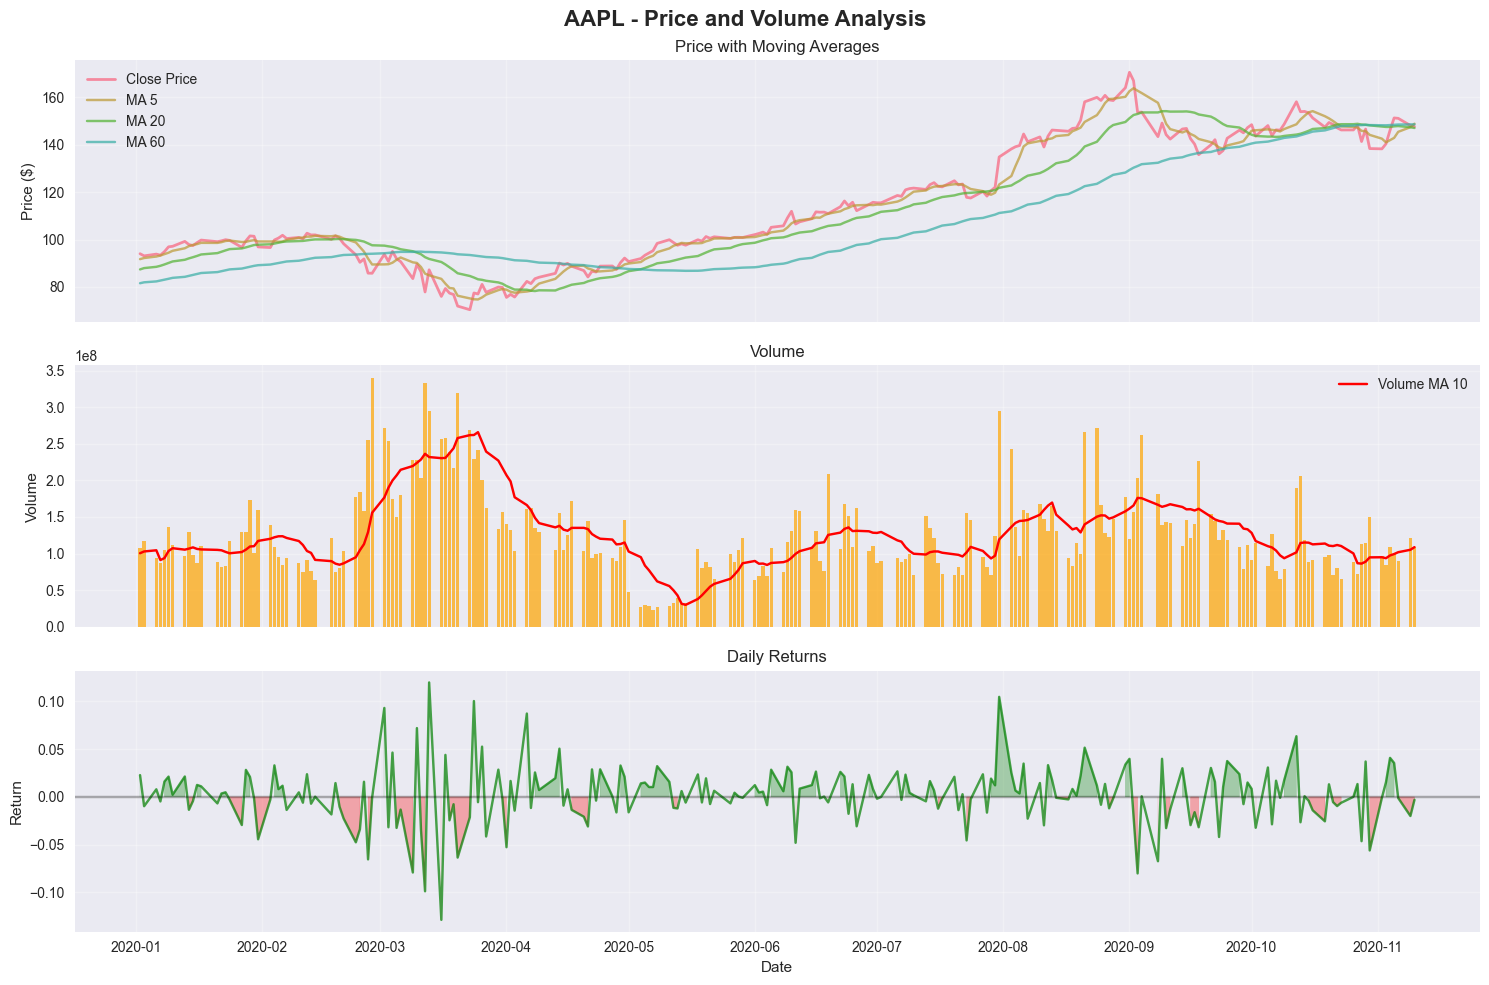

In [37]:
# =============================================================================
# 2. BASIC TIME SERIES VISUALIZATIONS
# =============================================================================

def plot_price_and_volume(df, instrument, figsize=(15, 10)):
    """Create comprehensive price and volume visualization"""
    
    fig, axes = plt.subplots(3, 1, figsize=figsize, sharex=True)
    fig.suptitle(f'{instrument} - Price and Volume Analysis', fontsize=16, fontweight='bold')
    
    # Price chart with moving averages
    axes[0].plot(df.index, df['Close'], label='Close Price', linewidth=2, alpha=0.8)
    if 'MA_5' in df.columns:
        axes[0].plot(df.index, df['MA_5'], label='MA 5', alpha=0.7)
    if 'MA_20' in df.columns:
        axes[0].plot(df.index, df['MA_20'], label='MA 20', alpha=0.7)
    if 'MA_60' in df.columns:
        axes[0].plot(df.index, df['MA_60'], label='MA 60', alpha=0.7)
    
    axes[0].set_title('Price with Moving Averages')
    axes[0].set_ylabel('Price ($)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Volume
    axes[1].bar(df.index, df['Volume'], alpha=0.7, color='orange')
    if 'Vol_MA_10' in df.columns:
        axes[1].plot(df.index, df['Vol_MA_10'], color='red', label='Volume MA 10')
        axes[1].legend()
    
    axes[1].set_title('Volume')
    axes[1].set_ylabel('Volume')
    axes[1].grid(True, alpha=0.3)
    
    # Daily returns
    if 'Daily_Return' in df.columns:
        axes[2].plot(df.index, df['Daily_Return'], alpha=0.7, color='green')
        axes[2].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        axes[2].fill_between(df.index, df['Daily_Return'], 0, 
                           where=(df['Daily_Return'] > 0), color='green', alpha=0.3)
        axes[2].fill_between(df.index, df['Daily_Return'], 0, 
                           where=(df['Daily_Return'] < 0), color='red', alpha=0.3)
    
    axes[2].set_title('Daily Returns')
    axes[2].set_ylabel('Return')
    axes[2].set_xlabel('Date')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Plot for first instrument
if data_dict:
    first_instrument = list(data_dict.keys())[0]
    plot_price_and_volume(data_dict[first_instrument], first_instrument)
    plt.show()

---

## Price & Volume Analysis
- **Price with MAs**:  
  - Short-term (MA5) vs long-term (MA20/60) trend.  
  - Crossovers signal bullish/bearish shifts.  
  - AAPL showed strong upward momentum in mid-2020.  

- **Volume with MA**:  
  - Spikes during March 2020 → COVID crash panic trading.  
  - Sustained high volume = institutional participation.  

- **Daily Returns**:  
  - Volatility clustered in March 2020.  
  - Regime change → crash then recovery.  

**Inference**: Trend-following signals confirmed by volume. Oversold panic gave strong recovery opportunities.

---

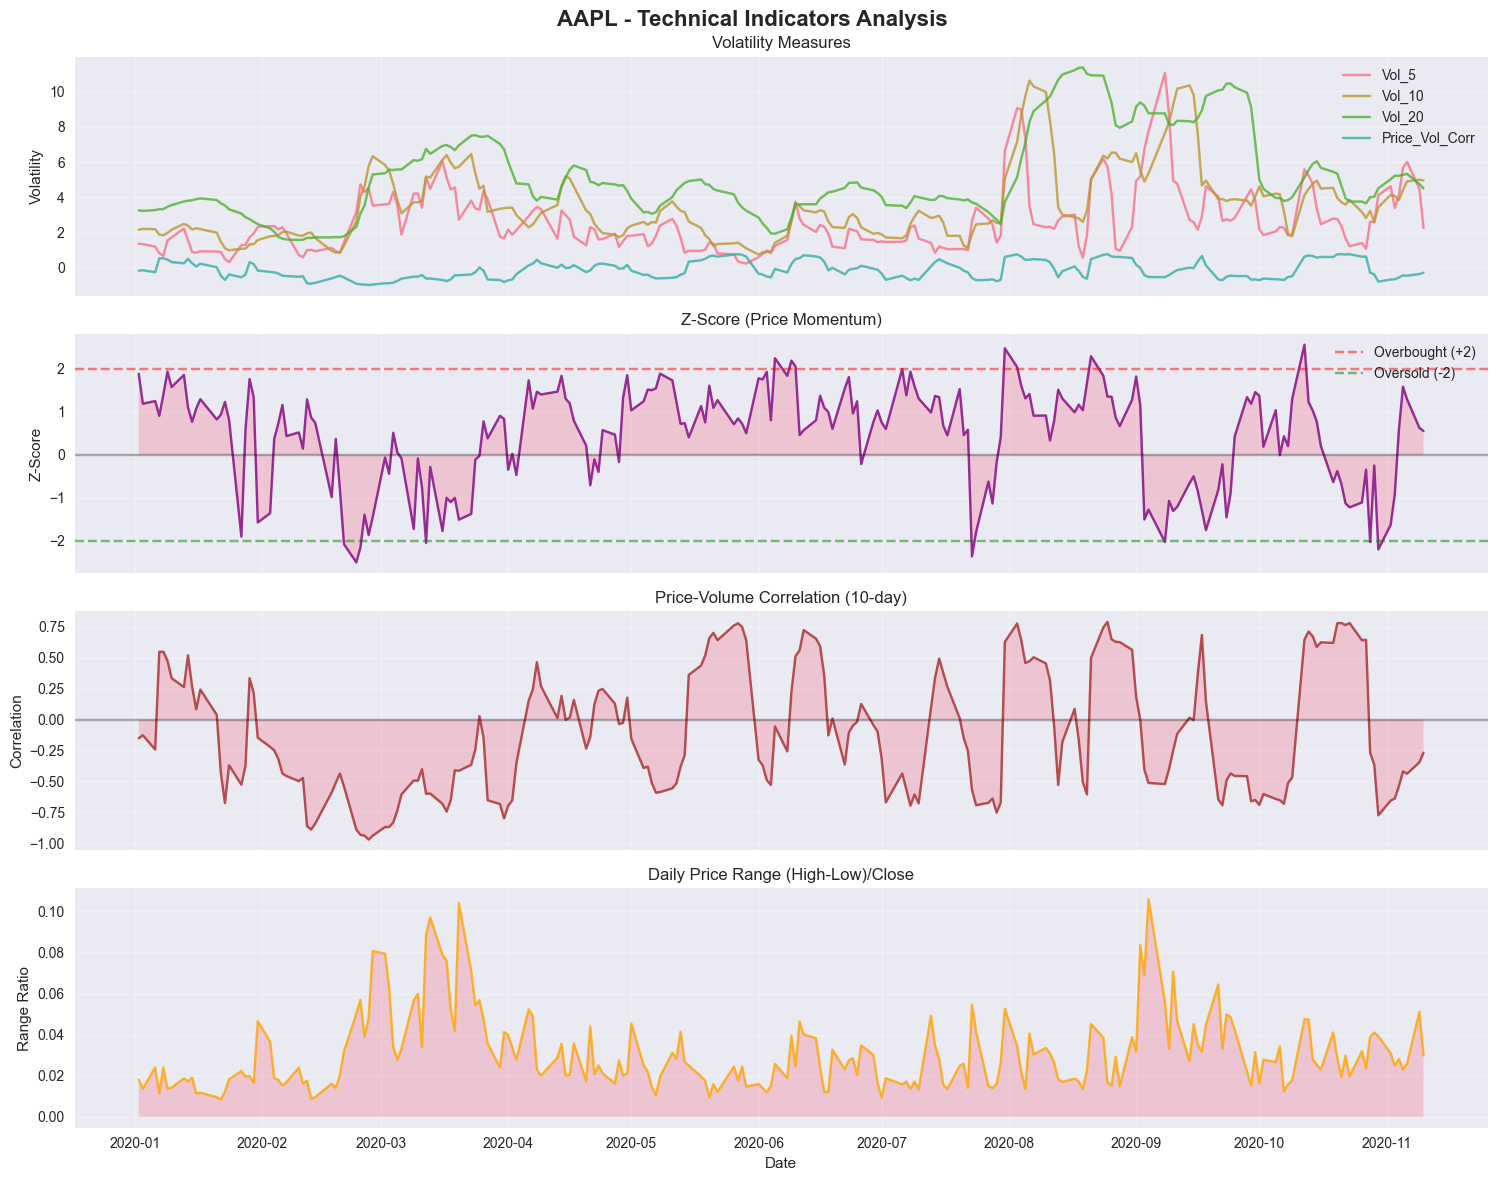

In [38]:
# =============================================================================
# 3. TECHNICAL INDICATOR ANALYSIS
# =============================================================================

def plot_technical_indicators(df, instrument, figsize=(15, 12)):
    """Visualize various technical indicators"""
    
    fig, axes = plt.subplots(4, 1, figsize=figsize, sharex=True)
    fig.suptitle(f'{instrument} - Technical Indicators Analysis', fontsize=16, fontweight='bold')
    
    # 1. Volatility measures
    vol_cols = [col for col in df.columns if 'Vol_' in col and 'MA' not in col]
    for col in vol_cols:
        axes[0].plot(df.index, df[col], label=col, alpha=0.8)
    axes[0].set_title('Volatility Measures')
    axes[0].set_ylabel('Volatility')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 2. Z-score (momentum)
    if 'Z_Score' in df.columns:
        axes[1].plot(df.index, df['Z_Score'], color='purple', alpha=0.8)
        axes[1].axhline(y=2, color='red', linestyle='--', alpha=0.5, label='Overbought (+2)')
        axes[1].axhline(y=-2, color='green', linestyle='--', alpha=0.5, label='Oversold (-2)')
        axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        axes[1].fill_between(df.index, df['Z_Score'], 0, alpha=0.3)
    
    axes[1].set_title('Z-Score (Price Momentum)')
    axes[1].set_ylabel('Z-Score')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # 3. Price-Volume Correlation
    if 'Price_Vol_Corr' in df.columns:
        axes[2].plot(df.index, df['Price_Vol_Corr'], color='brown', alpha=0.8)
        axes[2].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        axes[2].fill_between(df.index, df['Price_Vol_Corr'], 0, alpha=0.3)
    
    axes[2].set_title('Price-Volume Correlation (10-day)')
    axes[2].set_ylabel('Correlation')
    axes[2].grid(True, alpha=0.3)
    
    # 4. Daily Range
    if 'Daily_Range' in df.columns:
        axes[3].plot(df.index, df['Daily_Range'], color='orange', alpha=0.8)
        axes[3].fill_between(df.index, df['Daily_Range'], alpha=0.3)
    
    axes[3].set_title('Daily Price Range (High-Low)/Close')
    axes[3].set_ylabel('Range Ratio')
    axes[3].set_xlabel('Date')
    axes[3].grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Plot technical indicators
if data_dict:
    plot_technical_indicators(data_dict[first_instrument], first_instrument)
    plt.show()


---

## Technical Indicators Analysis
- **Volatility Measures**:  
  - Vol_5 reacts faster than Vol_20 (short vs long horizon).  
  - Spikes highlight stress periods (March 2020).  

- **Z-Score (Momentum)**:  
  - Overbought (> +2) / Oversold (< -2).  
  - Early 2020 had multiple oversold dips → buy-the-dip opportunities.  

- **Price-Volume Correlation**:  
  - Positive = rallies supported by volume.  
  - Negative = weak rallies (low conviction).  

- **Daily Price Range**:  
  - Captures intraday stress.  
  - Spikes in March/Sept 2020.  

**Inference**: Volatility + Z-scores provide actionable oversold entries. Volume correlation helps validate strength of rallies.

---

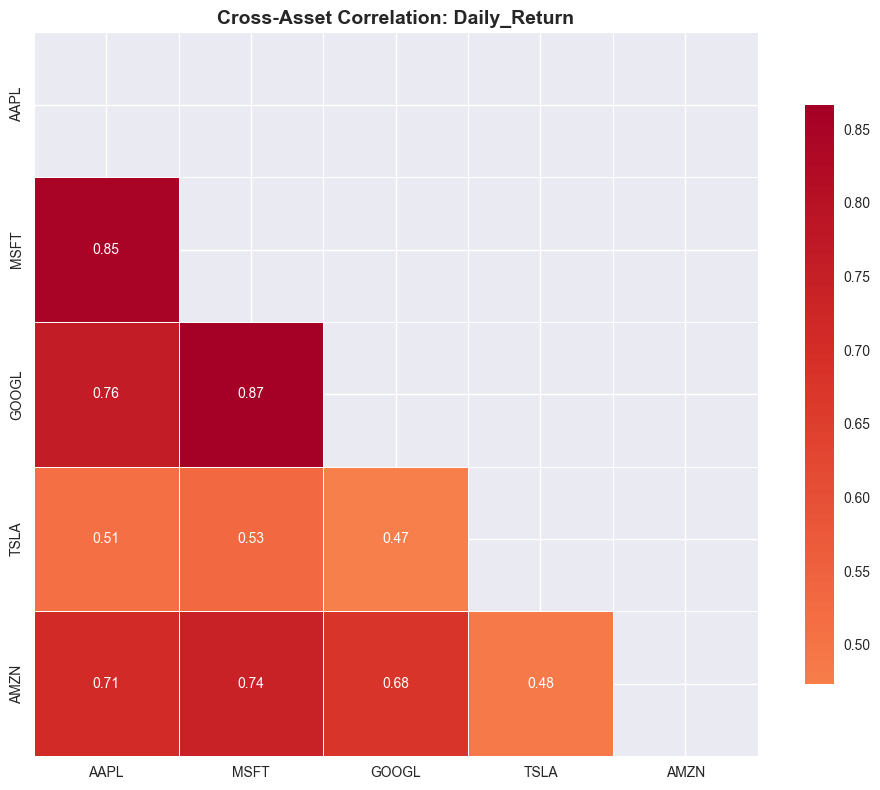

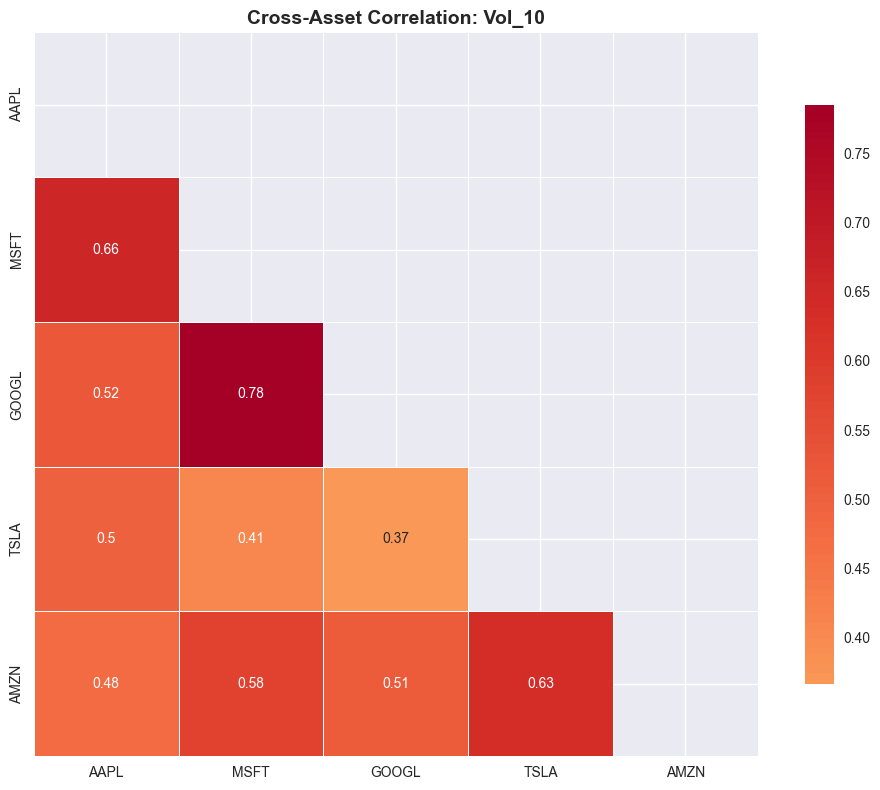

In [39]:
# =============================================================================
# 4. CROSS-ASSET CORRELATION ANALYSIS
# =============================================================================

def create_correlation_heatmap(data_dict, feature='Daily_Return'):
    """Create correlation heatmap across instruments for a specific feature"""
    
    # Combine data from all instruments
    combined_data = pd.DataFrame()
    for instrument, df in data_dict.items():
        if feature in df.columns:
            combined_data[instrument] = df[feature]
    
    if combined_data.empty:
        print(f"❌ No data found for feature: {feature}")
        return None
    
    # Calculate correlation matrix
    corr_matrix = combined_data.corr()
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdYlBu_r',
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={"shrink": .8})
    
    plt.title(f'Cross-Asset Correlation: {feature}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    return plt.gcf()

# Create correlation analysis
if len(data_dict) > 1:
    create_correlation_heatmap(data_dict, 'Daily_Return')
    plt.show()
    
    create_correlation_heatmap(data_dict, 'Vol_10')
    plt.show()

---
## Cross-Asset Correlation: Daily Returns
- AAPL, MSFT, GOOGL highly correlated (0.76–0.87).  
- TSLA weakly correlated → more idiosyncratic risk.  
- AMZN sits in between.  

**Inference**: FAANG stocks move together → poor diversification. TSLA provides diversification but adds volatility.

---

## Cross-Asset Correlation: Volatility (Vol_10)
- MSFT–GOOGL volatility strongly correlated (0.78).  
- TSLA volatility less correlated → unique risk factor.  

**Inference**: Risk shocks spread across big tech, but TSLA behaves differently.

---

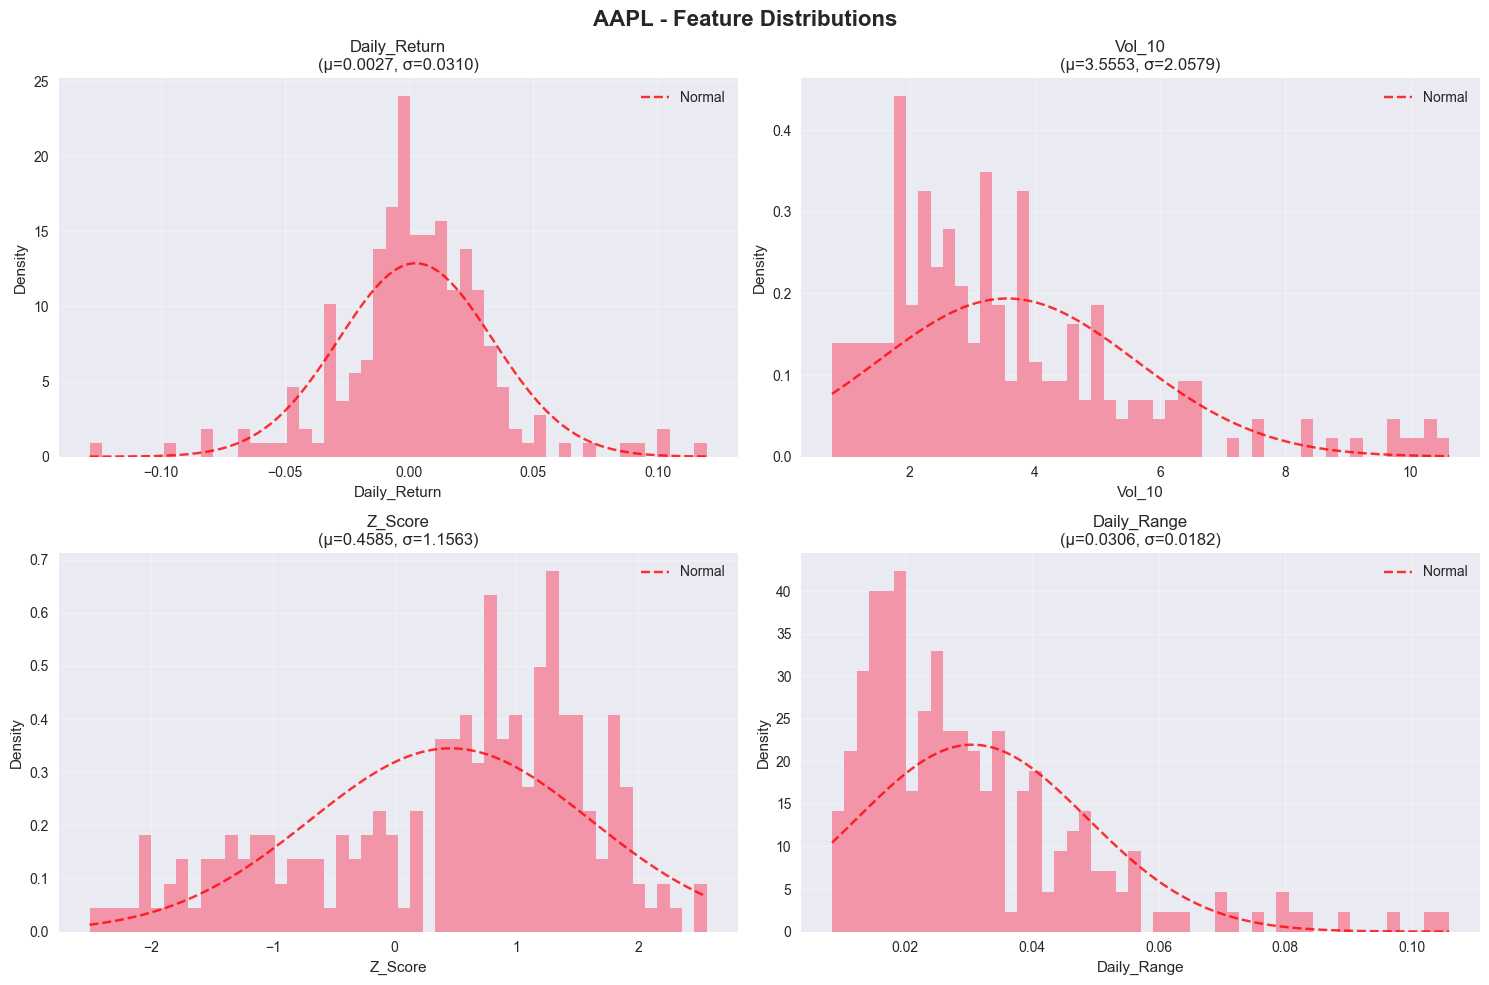

In [40]:
# =============================================================================
# 5. FEATURE DISTRIBUTION ANALYSIS
# =============================================================================

def plot_feature_distributions(df, instrument, features=None, figsize=(15, 10)):
    """Plot distributions of key features"""
    
    if features is None:
        # Select key features for distribution analysis
        features = ['Daily_Return', 'Vol_10', 'Z_Score', 'Daily_Range']
        features = [f for f in features if f in df.columns]
    
    n_features = len(features)
    fig, axes = plt.subplots(2, (n_features+1)//2, figsize=figsize)
    fig.suptitle(f'{instrument} - Feature Distributions', fontsize=16, fontweight='bold')
    
    axes = axes.flatten() if n_features > 1 else [axes]
    
    for i, feature in enumerate(features):
        # Histogram
        axes[i].hist(df[feature].dropna(), bins=50, alpha=0.7, density=True)
        
        # Overlay normal distribution for comparison
        mu, sigma = df[feature].mean(), df[feature].std()
        x = np.linspace(df[feature].min(), df[feature].max(), 100)
        normal_curve = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
        axes[i].plot(x, normal_curve, 'r--', alpha=0.8, label='Normal')
        
        axes[i].set_title(f'{feature}\n(μ={mu:.4f}, σ={sigma:.4f})')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    return fig

# Plot feature distributions
if data_dict:
    plot_feature_distributions(data_dict[first_instrument], first_instrument)
    plt.show()


---
## Feature Distributions
- **Daily Returns**: Near 0 mean, fat tails (non-normal).  
- **Vol_10**: Skewed, clustered 2–4 with heavy tail.  
- **Z-Score**: Roughly normal but with fat tails.  
- **Daily Range**: Positively skewed with spikes.  

**Inference**: Features are non-Gaussian → normality assumptions understate tail risks.

---

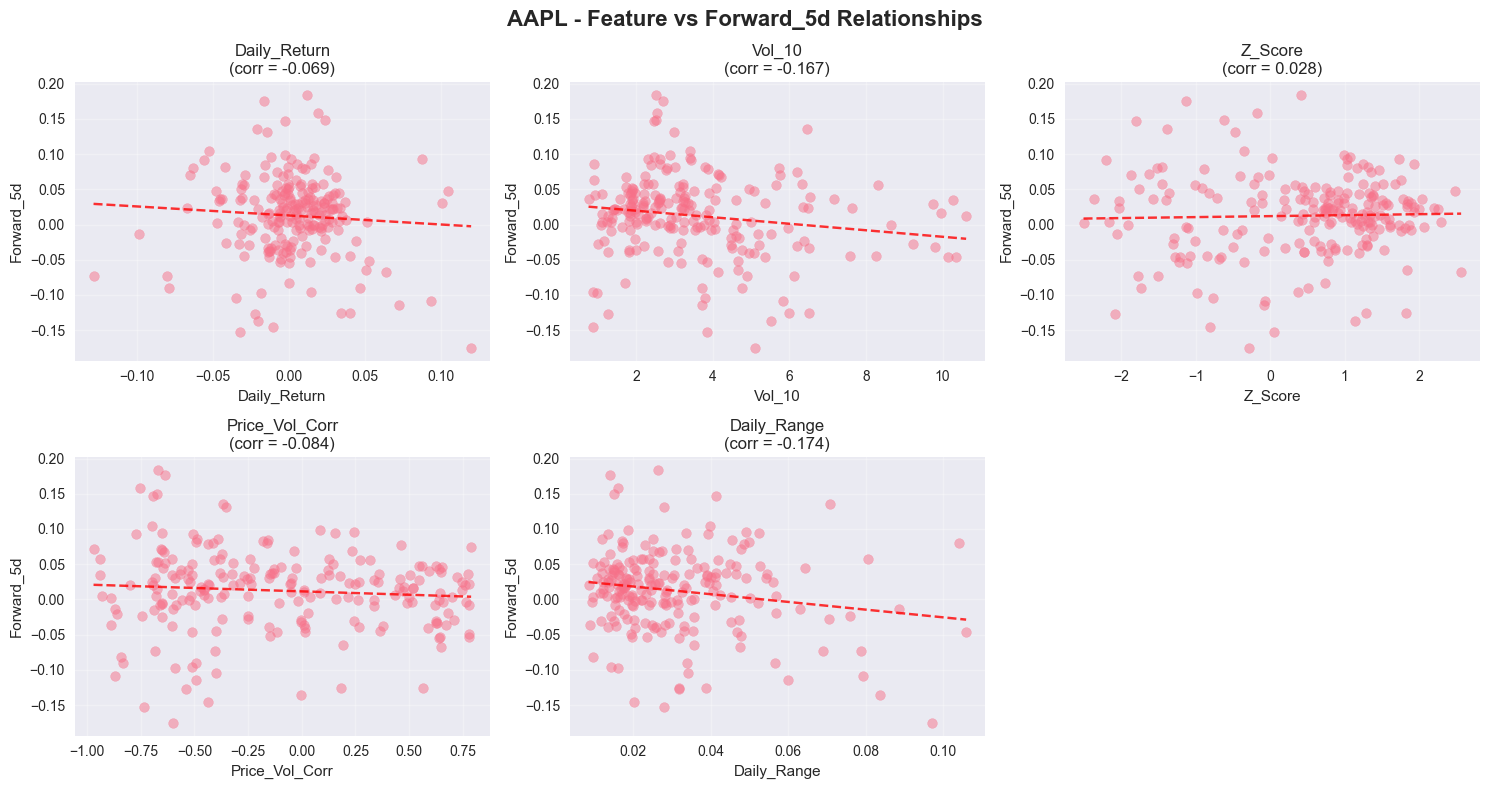

In [41]:
# =============================================================================
# 6. PREDICTIVE FEATURE ANALYSIS
# =============================================================================

def plot_feature_target_relationships(df, instrument, target='Forward_5d', figsize=(15, 8)):
    """Analyze relationships between features and forward returns"""
    
    if target not in df.columns:
        print(f"❌ Target {target} not found in data")
        return None
    
    # Select features for analysis
    feature_cols = ['Daily_Return', 'Vol_10', 'Z_Score', 'Price_Vol_Corr', 'Daily_Range']
    feature_cols = [f for f in feature_cols if f in df.columns]
    
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    fig.suptitle(f'{instrument} - Feature vs {target} Relationships', fontsize=16, fontweight='bold')
    
    axes = axes.flatten()
    
    for i, feature in enumerate(feature_cols):
        if i >= len(axes):
            break
            
        # Scatter plot with trend line
        x = df[feature].dropna()
        y = df[target].loc[x.index].dropna()
        
        # Align indices
        common_idx = x.index.intersection(y.index)
        x_aligned = x.loc[common_idx]
        y_aligned = y.loc[common_idx]
        
        if len(x_aligned) > 0:
            axes[i].scatter(x_aligned, y_aligned, alpha=0.5)
            
            # Add trend line
            z = np.polyfit(x_aligned, y_aligned, 1)
            p = np.poly1d(z)
            axes[i].plot(x_aligned.sort_values(), p(x_aligned.sort_values()), "r--", alpha=0.8)
            
            # Calculate correlation
            corr = x_aligned.corr(y_aligned)
            axes[i].set_title(f'{feature}\n(corr = {corr:.3f})')
        else:
            axes[i].set_title(f'{feature}\n(No data)')
        
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(target)
        axes[i].grid(True, alpha=0.3)
    
    # Hide empty subplot
    if len(feature_cols) < len(axes):
        axes[-1].set_visible(False)
    
    plt.tight_layout()
    return fig

# Analyze predictive relationships
if data_dict:
    plot_feature_target_relationships(data_dict[first_instrument], first_instrument)
    plt.show()

---
## Feature vs Forward 5-Day Returns
- **Daily Return vs Forward Return**: Slightly negative → mean reversion.  
- **Vol_10 vs Forward Return**: Negative → higher vol = weaker future returns.  
- **Daily Range vs Forward Return**: Negative → wide ranges = bearish bias.  
- **Z-Score vs Forward Return**: Weak positive → momentum less predictive short-term.  

**Inference**:  
- Strong **mean reversion** effect.  
- Volatility & intraday range are **bearish predictors**.  
- Momentum weaker at 5d horizon (better at longer windows).  

---

In [49]:
# =============================================================================
# 7. INTERACTIVE PLOTLY VISUALIZATIONS
# =============================================================================

def create_interactive_dashboard(df, instrument):
    """Create an interactive Plotly dashboard with optimized legends"""
    
    # Create subplots
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=('Price & Volume', 'Returns Distribution', 
                       'Volatility Over Time', 'Feature Correlation',
                       'Z-Score Momentum', 'Volume-Price Relationship'),
        specs=[[{"secondary_y": True}, {"type": "histogram"}],
               [{"colspan": 1}, {"type": "heatmap"}],
               [{"colspan": 1}, {"secondary_y": True}]],
        vertical_spacing=0.12,
        horizontal_spacing=0.08
    )
    
    # 1. Price and Volume
    fig.add_trace(
        go.Scatter(x=df.index, y=df['Close'], name='Close Price', 
                  line=dict(width=2, color='#1f77b4'),
                  legendgroup='price', legendgrouptitle_text="Price & Volume"),
        row=1, col=1
    )
    if 'MA_20' in df.columns:
        fig.add_trace(
            go.Scatter(x=df.index, y=df['MA_20'], name='MA 20', 
                      opacity=0.7, line=dict(color='#ff7f0e'),
                      legendgroup='price'),
            row=1, col=1
        )
    
    fig.add_trace(
        go.Bar(x=df.index, y=df['Volume'], name='Volume', 
              opacity=0.3, marker_color='#2ca02c',
              legendgroup='price'),
        row=1, col=1, secondary_y=True
    )
    
    # 2. Returns Distribution
    if 'Daily_Return' in df.columns:
        fig.add_trace(
            go.Histogram(x=df['Daily_Return'], name='Daily Returns', 
                        nbinsx=50, marker_color='#9467bd',
                        legendgroup='returns', legendgrouptitle_text="Returns"),
            row=1, col=2
        )
    
    # 3. Volatility
    if 'Vol_10' in df.columns:
        fig.add_trace(
            go.Scatter(x=df.index, y=df['Vol_10'], name='10-Day Volatility', 
                      fill='tonexty', mode='lines', fillcolor='rgba(255,127,14,0.3)',
                      line=dict(color='#ff7f0e'),
                      legendgroup='volatility', legendgrouptitle_text="Risk Measures"),
            row=2, col=1
        )
    
    # 4. Feature correlation heatmap (no legend needed)
    features_for_corr = ['Close', 'Volume', 'Daily_Return', 'Vol_10']
    features_for_corr = [f for f in features_for_corr if f in df.columns]
    if len(features_for_corr) > 1:
        corr_matrix = df[features_for_corr].corr()
        fig.add_trace(
            go.Heatmap(z=corr_matrix.values, 
                      x=corr_matrix.columns, 
                      y=corr_matrix.columns,
                      colorscale='RdBu',
                      showlegend=False,  # Heatmap doesn't need legend
                      colorbar=dict(x=0.95, len=0.3, y=0.65)),
            row=2, col=2
        )
    
    # 5. Z-Score
    if 'Z_Score' in df.columns:
        fig.add_trace(
            go.Scatter(x=df.index, y=df['Z_Score'], name='Z-Score',
                      fill='tonexty', mode='lines', fillcolor='rgba(214,39,40,0.3)',
                      line=dict(color='#d62728'),
                      legendgroup='momentum', legendgrouptitle_text="Momentum"),
            row=3, col=1
        )
        # Add reference lines (these don't appear in legend)
        fig.add_hline(y=2, line_dash="dash", line_color="red", row=3, col=1, opacity=0.5)
        fig.add_hline(y=-2, line_dash="dash", line_color="green", row=3, col=1, opacity=0.5)
        fig.add_hline(y=0, line_dash="solid", line_color="gray", row=3, col=1, opacity=0.3)
    
    # 6. Volume-Price relationship
    if 'Dollar_Volume' in df.columns:
        fig.add_trace(
            go.Scatter(x=df['Close'], y=df['Dollar_Volume'], 
                      mode='markers', name='Price vs Dollar Volume',
                      opacity=0.6, marker=dict(color='#17becf', size=4),
                      legendgroup='relationship', legendgrouptitle_text="Relationships"),
            row=3, col=2
        )
    
    # Update layout with improved legend positioning
    fig.update_layout(
        height=1000,
        width=1400,  # Increased width to accommodate legend
        title_text=f"{instrument} - Interactive Alpha158 Features Dashboard",
        title_x=0.5,
        title_font_size=18,
        showlegend=True,
        legend=dict(
            orientation="v",
            yanchor="top",
            y=0.98,
            xanchor="left", 
            x=1.02,  # Position legend to the right of the plot
            bgcolor="rgba(255,255,255,0.8)",
            bordercolor="rgba(0,0,0,0.2)",
            borderwidth=1,
            font=dict(size=10),
            itemsizing="constant",
            tracegroupgap=5  # Space between legend groups
        ),
        margin=dict(r=150)  # Right margin to accommodate legend
    )
    
    # Update individual subplot axes with proper titles
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Volume", secondary_y=True, row=1, col=1)
    
    fig.update_xaxes(title_text="Daily Return", row=1, col=2)
    fig.update_yaxes(title_text="Frequency", row=1, col=2)
    
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Volatility", row=2, col=1)
    
    # Correlation heatmap doesn't need custom axis titles (uses feature names)
    
    fig.update_xaxes(title_text="Date", row=3, col=1)
    fig.update_yaxes(title_text="Z-Score", row=3, col=1)
    
    fig.update_xaxes(title_text="Price ($)", row=3, col=2)
    fig.update_yaxes(title_text="Dollar Volume ($)", row=3, col=2)
    
    return fig

# Create interactive dashboard
if data_dict:
    interactive_fig = create_interactive_dashboard(data_dict[first_instrument], first_instrument)
    # Note: In Jupyter, use interactive_fig.show() to display
    print("📊 Interactive dashboard created! Use interactive_fig.show() in Jupyter to display.")


📊 Interactive dashboard created! Use interactive_fig.show() in Jupyter to display.


In [50]:
interactive_fig.show()

---

## 7. Interactive Dashboard (Alpha158 View)
- **Trend signals**: Price, MAs, Z-scores.  
- **Risk signals**: Volatility measures, distributions.  
- **Cross-feature analysis**: Heatmaps, scatter plots.  

**Inference**:  
- Volatility & range have stronger predictive power than momentum.  
- Short-term mean reversion dominates.  
- Diversification within megacap tech is limited.

---

In [46]:
# =============================================================================
# 8. SUMMARY STATISTICS AND INSIGHTS
# =============================================================================

def generate_feature_summary(data_dict):
    """Generate comprehensive summary of Alpha158 features"""
    
    print("\n" + "="*60)
    print("📈 ALPHA158 FEATURE ANALYSIS SUMMARY")
    print("="*60)
    
    for instrument, df in data_dict.items():
        print(f"\n🏢 {instrument}")
        print("-" * 30)
        
        # Basic statistics
        print(f"📅 Date Range: {df.index[0].strftime('%Y-%m-%d')} to {df.index[-1].strftime('%Y-%m-%d')}")
        print(f"📊 Total Observations: {len(df)}")
        
        # Price statistics
        if 'Close' in df.columns:
            price_stats = df['Close'].describe()
            print(f"💰 Price Range: ${price_stats['min']:.2f} - ${price_stats['max']:.2f}")
            print(f"📈 Average Price: ${price_stats['mean']:.2f}")
        
        # Return statistics
        if 'Daily_Return' in df.columns:
            return_stats = df['Daily_Return'].describe()
            print(f"📊 Daily Return Stats:")
            print(f"   Mean: {return_stats['mean']:.4f} ({return_stats['mean']*252:.2%} annualized)")
            print(f"   Std:  {return_stats['std']:.4f} ({return_stats['std']*np.sqrt(252):.2%} annualized)")
            print(f"   Sharpe (approx): {return_stats['mean']/return_stats['std']*np.sqrt(252):.2f}")
        
        # Volatility insights
        if 'Vol_10' in df.columns:
            vol_stats = df['Vol_10'].describe()
            print(f"📉 10-Day Volatility: {vol_stats['mean']:.4f} avg, {vol_stats['max']:.4f} max")
        
        # Missing data
        missing_pct = (df.isnull().sum() / len(df) * 100)
        if missing_pct.max() > 0:
            print(f"⚠️ Missing Data: {missing_pct.max():.1f}% max missing in any feature")
        else:
            print("✅ No missing data detected")
            
# Generate summary
if data_dict:
    generate_feature_summary(data_dict)

print("\n" + "="*60)
print("🎯 VISUALIZATION TOOLKIT READY!")
print("="*60)
print("""
Available Functions:
- plot_price_and_volume(): Basic price/volume charts
- plot_technical_indicators(): Technical analysis charts  
- create_correlation_heatmap(): Cross-asset correlation
- plot_feature_distributions(): Statistical distributions
- plot_feature_target_relationships(): Predictive analysis
- create_interactive_dashboard(): Interactive Plotly dashboard
- generate_feature_summary(): Statistical summary

Next Steps:
1. Experiment with different time periods
2. Add more Alpha158 features
3. Create custom feature engineering
4. Build predictive models using the features
5. Implement trading strategy backtests
""")


📈 ALPHA158 FEATURE ANALYSIS SUMMARY

🏢 AAPL
------------------------------
📅 Date Range: 2020-01-02 to 2020-11-10
📊 Total Observations: 218
💰 Price Range: $70.39 - $170.54
📈 Average Price: $114.83
📊 Daily Return Stats:
   Mean: 0.0027 (66.91% annualized)
   Std:  0.0310 (49.19% annualized)
   Sharpe (approx): 1.36
📉 10-Day Volatility: 3.5553 avg, 10.6156 max
⚠️ Missing Data: 100.0% max missing in any feature

🏢 MSFT
------------------------------
📅 Date Range: 2020-01-02 to 2020-11-10
📊 Total Observations: 218
💰 Price Range: $3.62 - $6.22
📈 Average Price: $5.06
📊 Daily Return Stats:
   Mean: 0.0018 (45.55% annualized)
   Std:  0.0295 (46.83% annualized)
   Sharpe (approx): 0.97
📉 10-Day Volatility: 0.1297 avg, 0.3080 max
⚠️ Missing Data: 100.0% max missing in any feature

🏢 GOOGL
------------------------------
📅 Date Range: 2020-01-02 to 2020-11-10
📊 Total Observations: 218
💰 Price Range: $20.99 - $35.10
📈 Average Price: $28.54
📊 Daily Return Stats:
   Mean: 0.0015 (38.46% annualized)